In [1]:
# pip install tensorflow==2.13.0
# pip install --upgrade imbalanced-learn
# pip install keras_tuner
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
import sklearn

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\Khóa luận\\Customer Churn In Bank (Khóa luận).csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


1. EDA
- Tính toán thống kê
- Distribution
- Outlier
- Insight từ dữ liệu

In [58]:
data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Point Earned"]].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


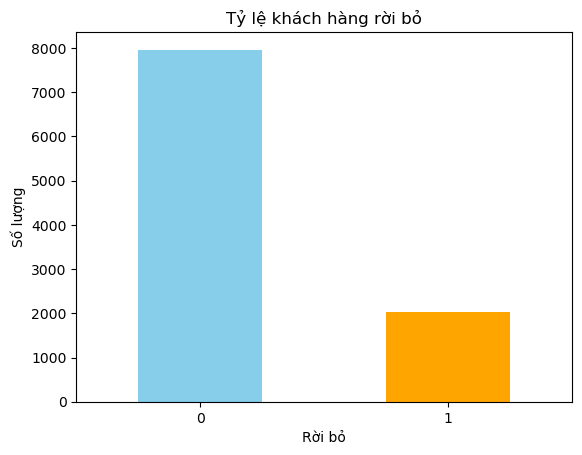

In [5]:
counts = data.Exited.value_counts()

ax = counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Tỷ lệ khách hàng rời bỏ")
plt.xlabel("Rời bỏ")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)  # Không xoay nhãn trên trục x
plt.show()



In [6]:
counts

Exited
0    7962
1    2038
Name: count, dtype: int64

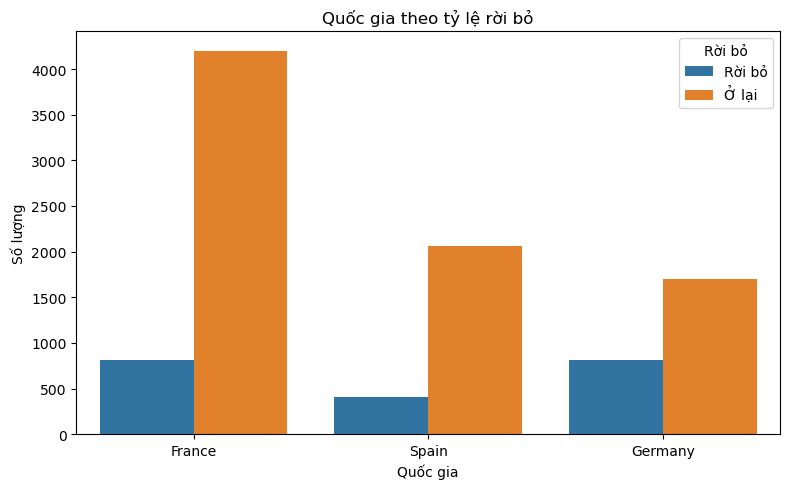

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Geography', hue=data.Exited.astype("str"))
plt.title('Quốc gia theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Quốc gia')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

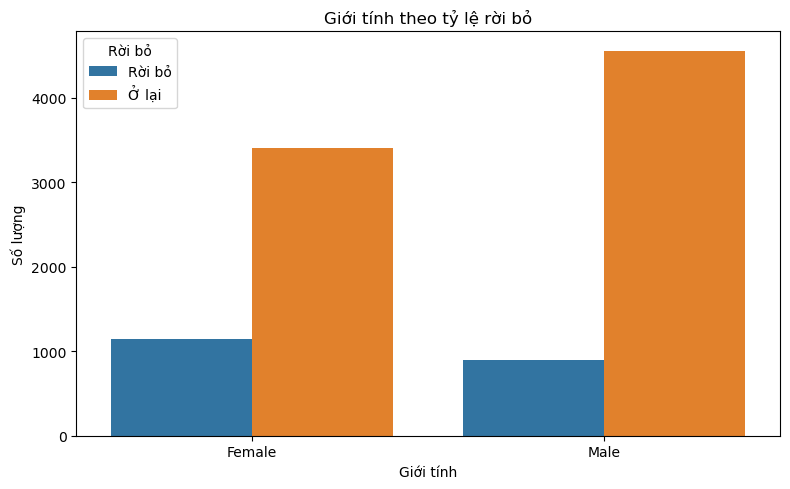

In [10]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Gender', hue=data.Exited.astype("str"))
plt.title('Giới tính theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Giới tính')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

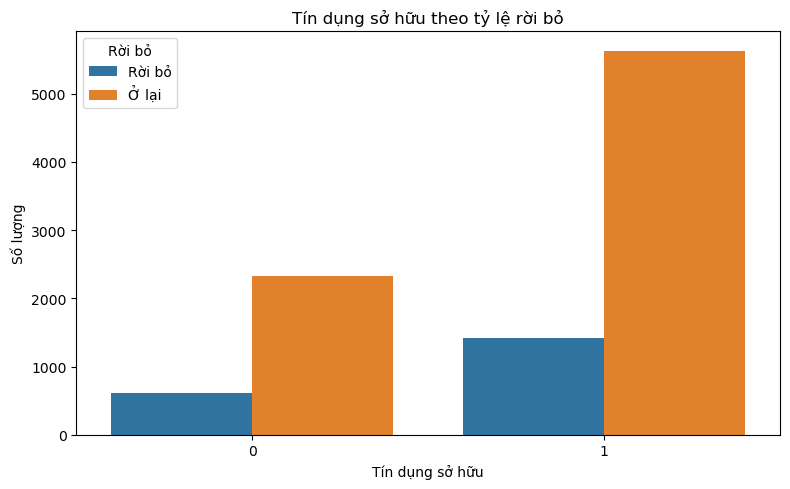

In [11]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='HasCrCard', hue=data.Exited.astype("str"))
plt.title('Tín dụng sở hữu theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Tín dụng sở hữu')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

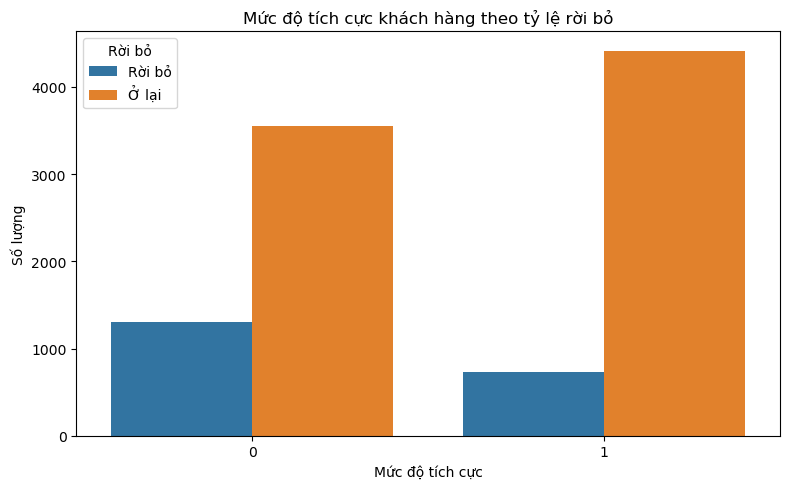

In [18]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='IsActiveMember', hue=data.Exited.astype("str"))
plt.title('Mức độ tích cực khách hàng theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Mức độ tích cực')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

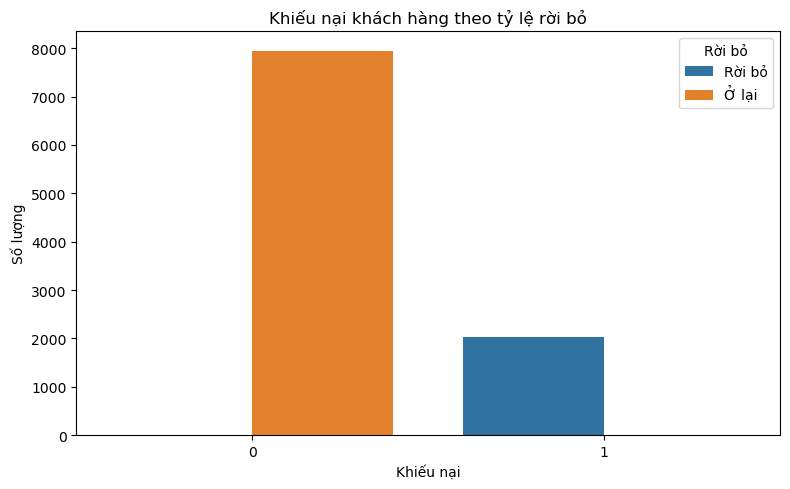

In [13]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Complain', hue=data.Exited.astype("str"))
plt.title('Khiếu nại khách hàng theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Khiếu nại')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

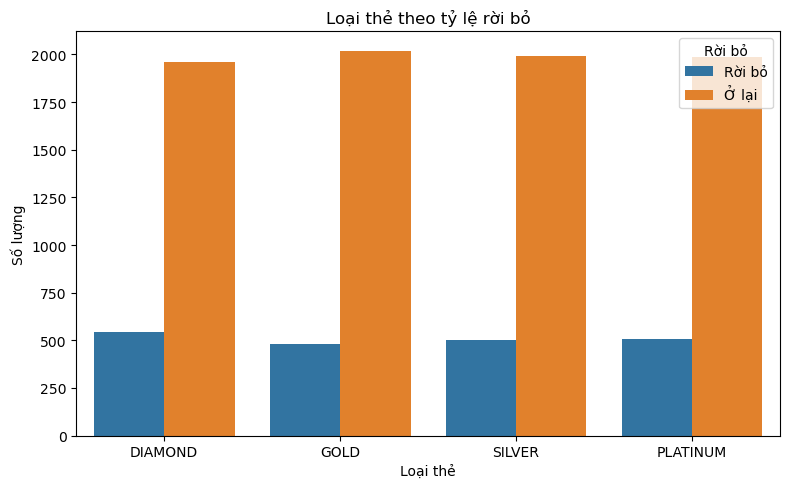

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=data, x='Card Type', hue=data.Exited.astype("str"))
plt.title('Loại thẻ theo tỷ lệ rời bỏ')
plt.ylabel('Số lượng')
plt.xlabel('Loại thẻ')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')

plt.tight_layout()
plt.show()

In [21]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


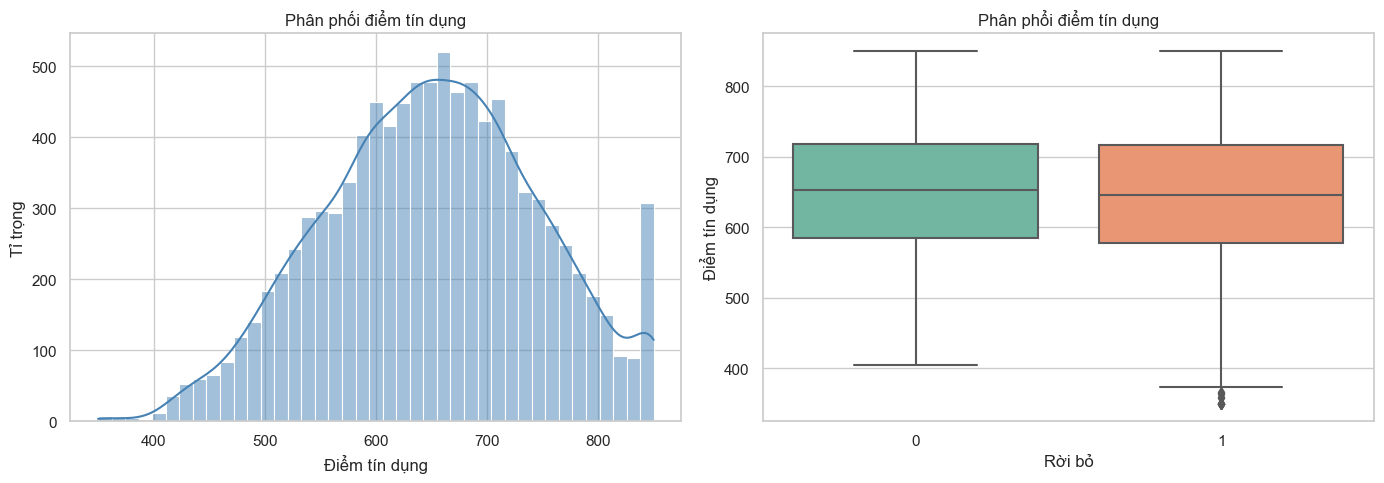

In [15]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['CreditScore'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối điểm tín dụng')
axes[0].set_xlabel('Điểm tín dụng')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='CreditScore', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phổi điểm tín dụng')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Điểm tín dụng')

# Lấy handles và labels mặc định
handles, labels = ax.get_legend_handles_labels()

# Đổi nhãn legend, ví dụ "0" -> "Không rời bỏ", "1" -> "Rời bỏ"
ax.legend(handles=handles, labels=['Rời bỏ', 'Ở lại'], title='Rời bỏ')


plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


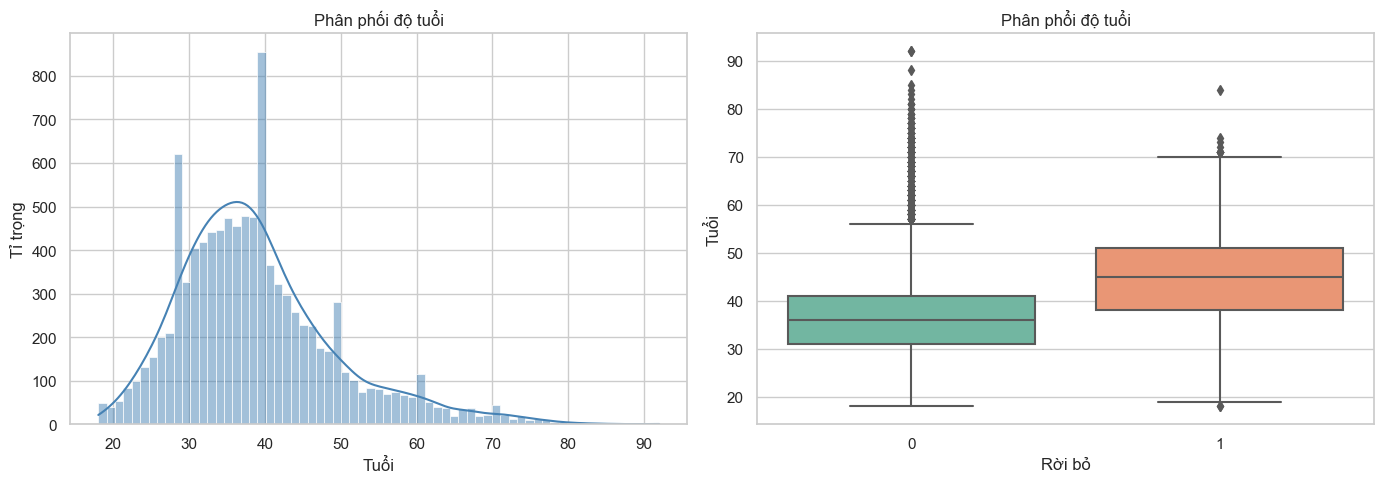

In [16]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['Age'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối độ tuổi')
axes[0].set_xlabel('Tuổi')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='Age', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phổi độ tuổi')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Tuổi')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


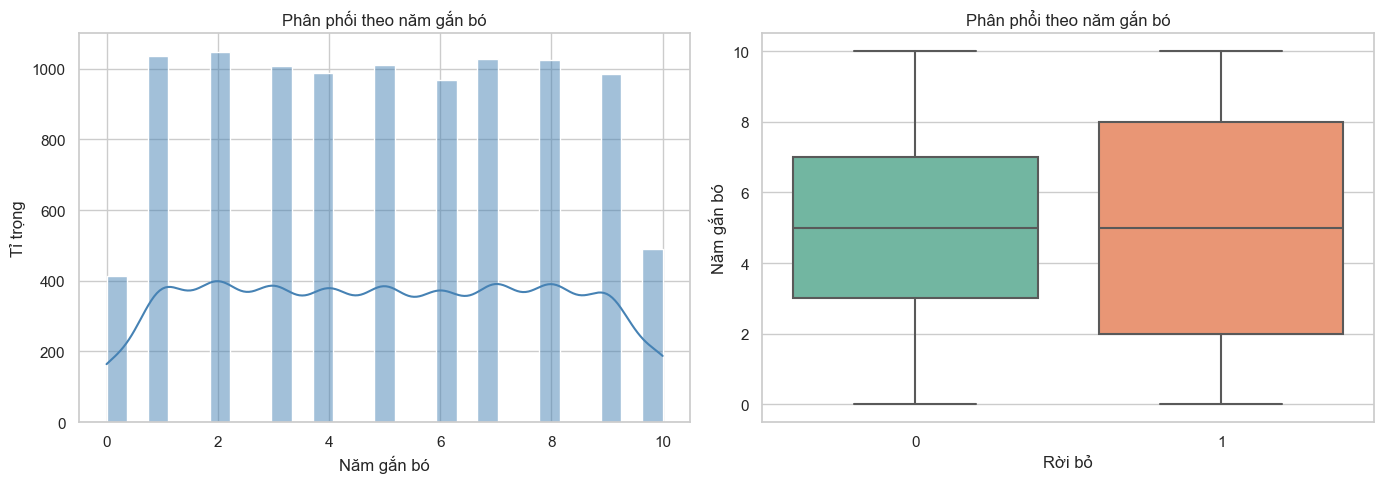

In [25]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['Tenure'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối theo năm gắn bó')
axes[0].set_xlabel('Năm gắn bó')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='Tenure', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phổi theo năm gắn bó')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Năm gắn bó')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


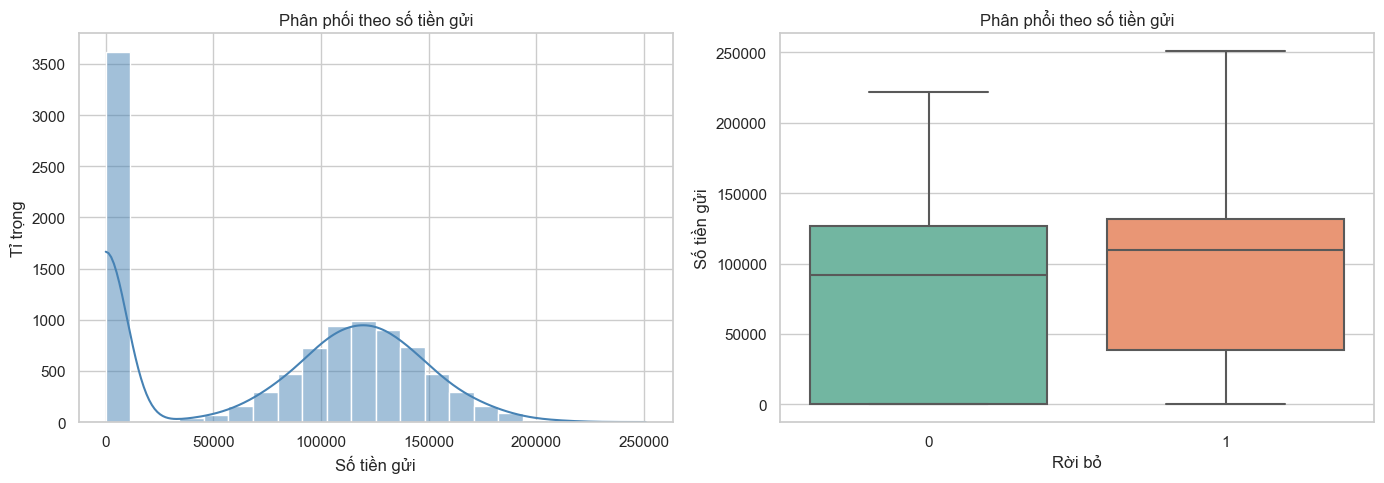

In [26]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['Balance'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối theo số tiền gửi')
axes[0].set_xlabel('Số tiền gửi')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='Balance', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phổi theo số tiền gửi')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Số tiền gửi')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


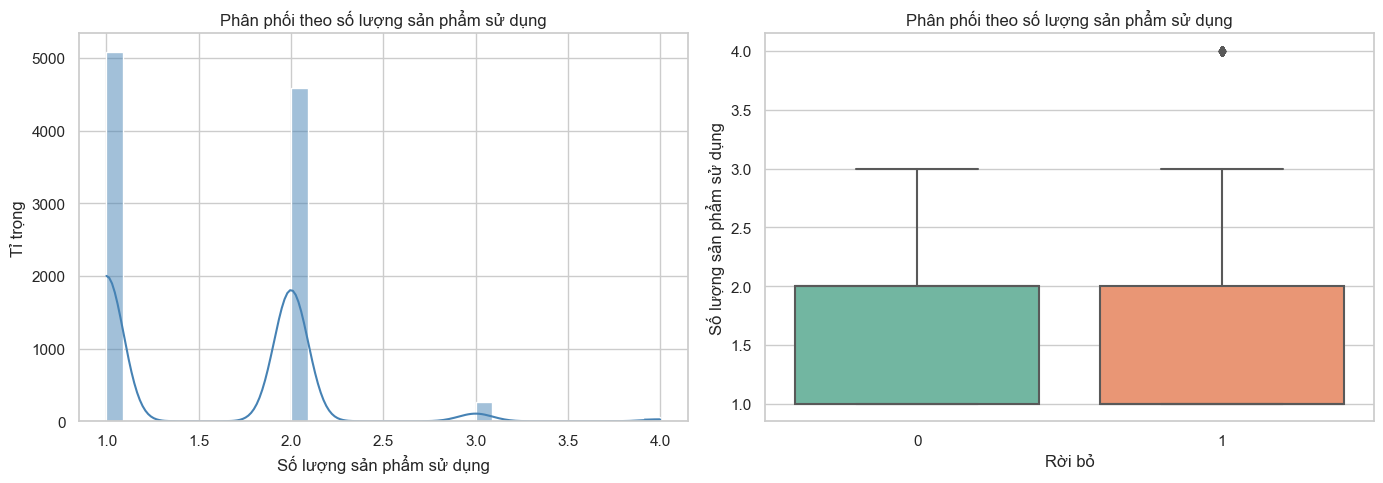

In [27]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['NumOfProducts'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối theo số lượng sản phẩm sử dụng')
axes[0].set_xlabel('Số lượng sản phẩm sử dụng')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='NumOfProducts', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phối theo số lượng sản phẩm sử dụng')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Số lượng sản phẩm sử dụng')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


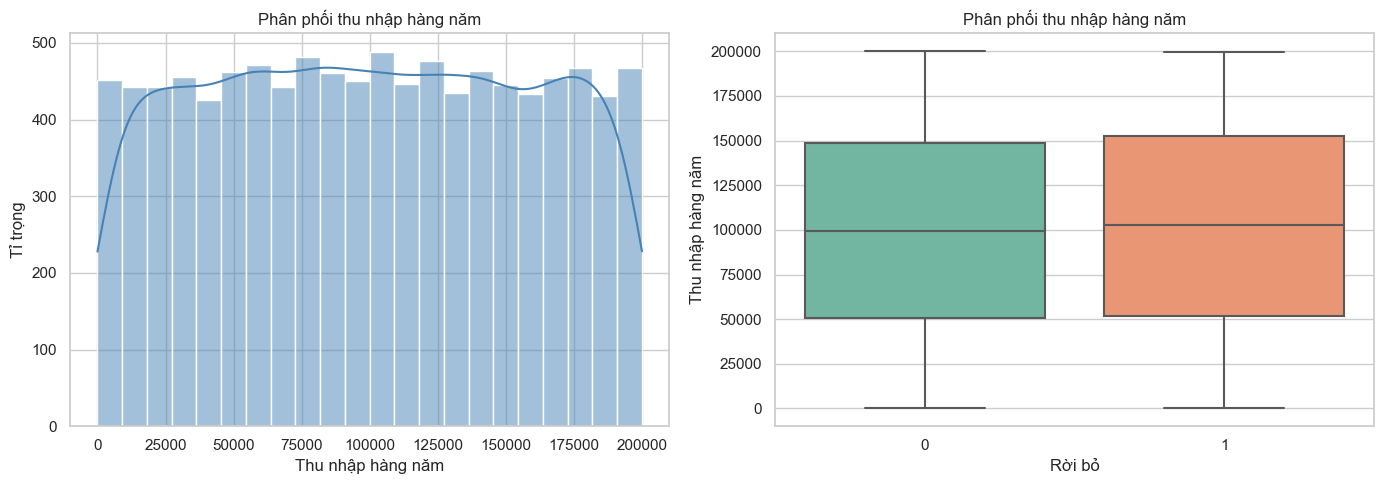

In [28]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['EstimatedSalary'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối thu nhập hàng năm')
axes[0].set_xlabel('Thu nhập hàng năm')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='EstimatedSalary', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phối thu nhập hàng năm')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Thu nhập hàng năm')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


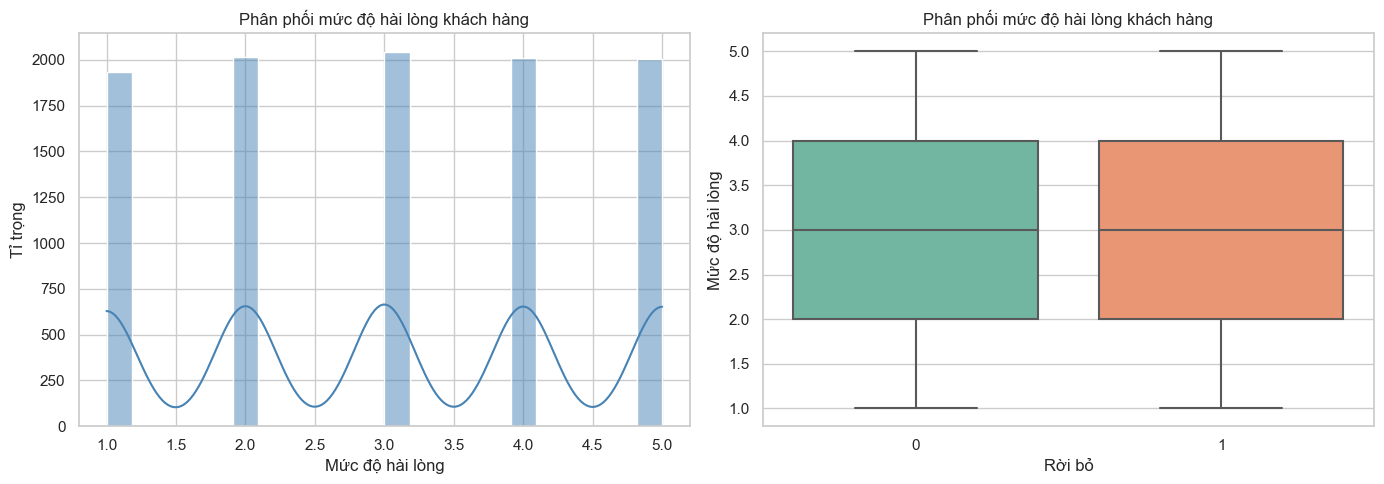

In [29]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['Satisfaction Score'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối mức độ hài lòng khách hàng')
axes[0].set_xlabel('Mức độ hài lòng')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='Satisfaction Score', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phối mức độ hài lòng khách hàng')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Mức độ hài lòng')

plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


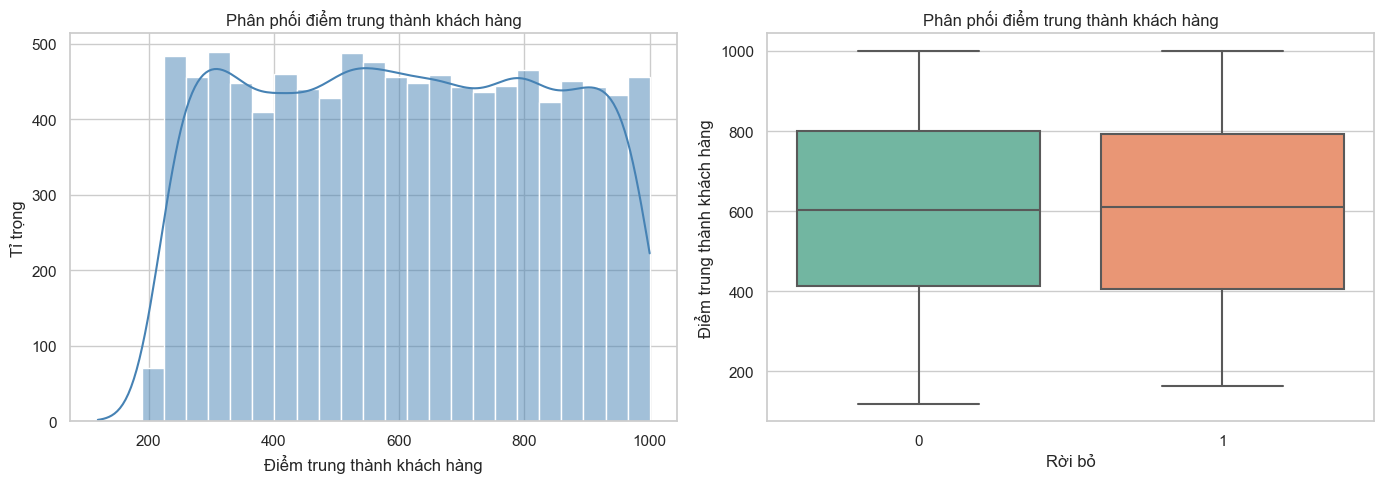

In [30]:
sns.set(style="whitegrid")

# Tạo figure với 2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ Histogram với KDE
sns.histplot(data['Point Earned'], kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('Phân phối điểm trung thành khách hàng')
axes[0].set_xlabel('Điểm trung thành khách hàng')
axes[0].set_ylabel('Tỉ trọng')

# Biểu đồ Boxplot phân theo biến Target
sns.boxplot(x='Exited', y='Point Earned', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Phân phối điểm trung thành khách hàng')
axes[1].set_xlabel('Rời bỏ')
axes[1].set_ylabel('Điểm trung thành khách hàng')

plt.tight_layout()
plt.show()

In [40]:
df = pd.get_dummies(data.drop(columns = [ "Surname", "RowNumber","CustomerId"] ))

In [41]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,...,300,True,False,False,False,True,True,False,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,...,771,True,False,False,False,True,False,False,True,False
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,564,True,False,False,True,False,False,False,False,True
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,...,339,False,True,False,False,True,False,True,False,False


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  bool   
 13  Geography_Germany   10000 non-null  bool   
 14  Geography_Spain     10000 non-null  bool   
 15  Gender_Female       10000 non-null  bool   
 16  Gende

In [61]:
df["Point Earned"].sort_values()


12       119
16       163
6        206
3193     219
284      219
        ... 
9750    1000
4271    1000
2011    1000
2664    1000
8915    1000
Name: Point Earned, Length: 10000, dtype: int64

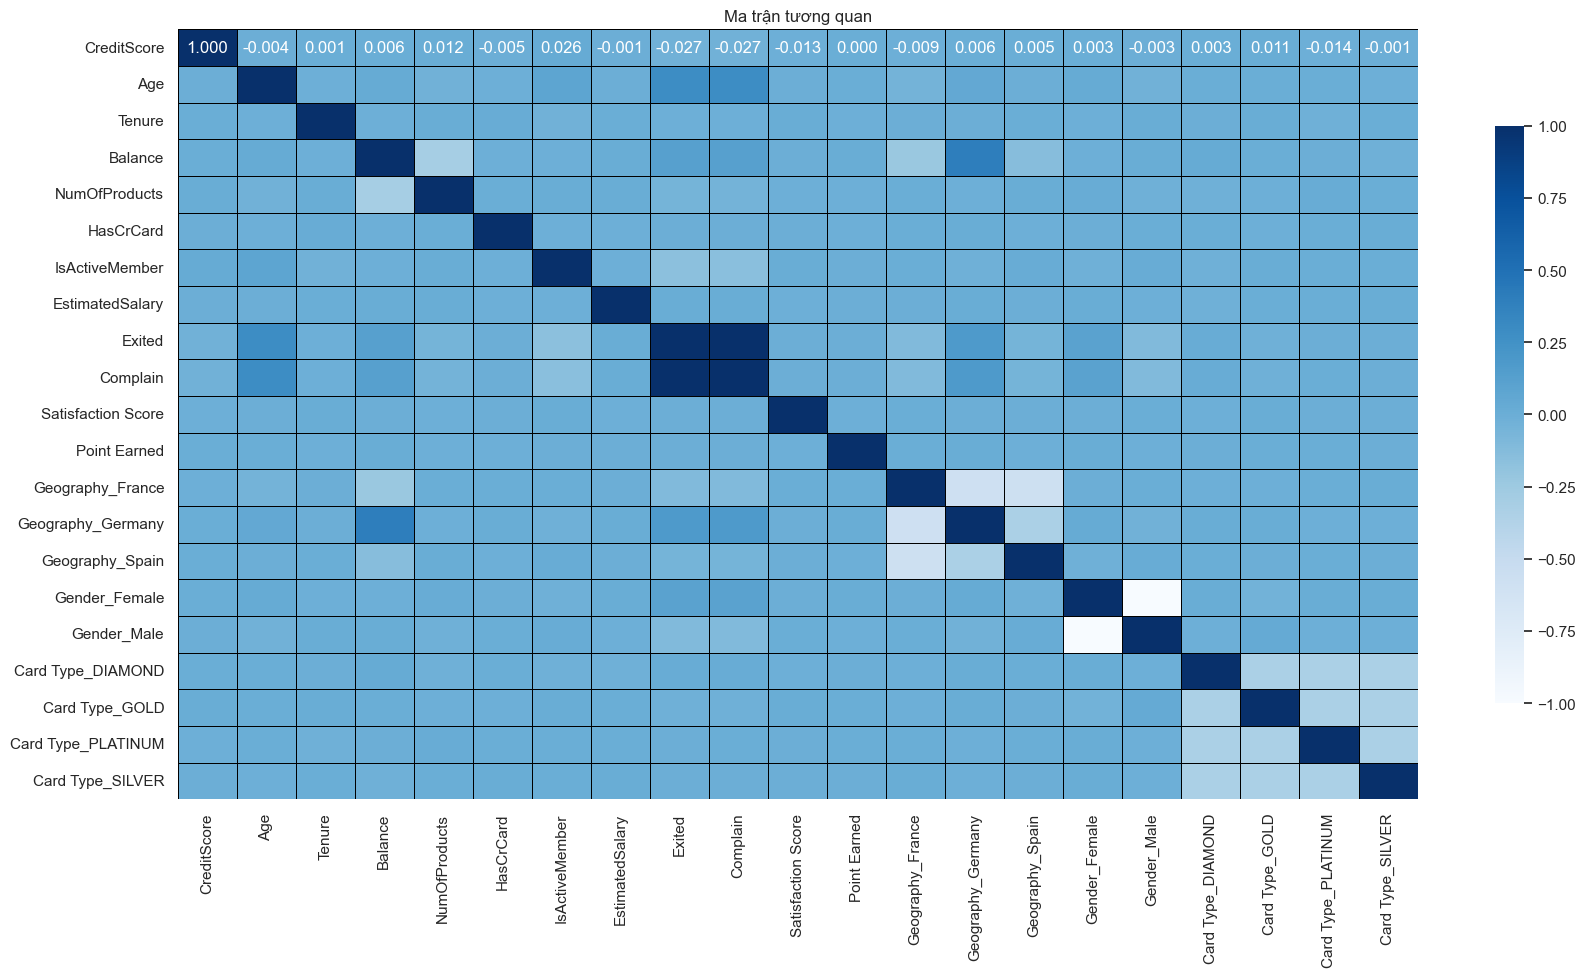

In [61]:
corr_matrix = df.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".3f", cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='black')
plt.title('Ma trận tương quan')
plt.show()



In [3]:
y = data.Exited
X = data.drop(columns = ["Exited", "Surname", "RowNumber","CustomerId", "Card Type", "Complain"] )
print("X Shape", X.shape)
print("Y Shape", y.shape)

X Shape (10000, 12)
Y Shape (10000,)


In [4]:
x = pd.get_dummies(X)

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,2,464,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,3,456,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,3,377,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,5,350,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,5,425,False,False,True,True,False


In [5]:
#  Create train_test set
random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=random_state,
                                                   stratify=data.Exited)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

7000 3000 7000 3000


In [10]:
X_train.shape

(11146, 15)

In [19]:
y_train.shape


(7000,)

In [22]:
y_train.value_counts()

Exited
0    5573
1    5573
Name: count, dtype: int64

In [6]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
1. ANN

In [7]:
import keras_tuner as kt

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
def build_model(hp): # định nghĩa mô hình cần tối ưu
    model = Sequential()
    
    # Input layer + Hidden layer 1
    model.add(Dense(
        units=hp.Int('units_input', min_value=8, max_value=128, step=8),
        activation=hp.Choice('activation_input', ['relu', 'tanh']),
        input_dim=15  # số features sau khi xử lý
    ))
    
    # Optional Dropout
    model.add(Dropout(hp.Float('dropout_input', 0.0, 0.5, step=0.1)))
    
    # Hidden layer 2 (tùy chọn số units và activation)
    model.add(Dense(
        units=hp.Int('units_hidden', min_value=8, max_value=64, step=8),
        activation=hp.Choice('activation_hidden', ['relu', 'tanh'])
    ))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', [0.01, 0.001, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [15]:
# Khởi tạo early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [16]:
# Khởi tạo keras tunner
from keras_tuner import Hyperband
tuner = Hyperband(
    build_model,  # Sử dụng hàm model_builder
    objective='val_accuracy',  # Mục tiêu tối ưu hóa
    max_epochs=50,  # Số lượng epoch tối đa cho mỗi thử nghiệm
    directory=tuning_dir,  # Đường dẫn lưu trữ kết quả
    project_name='churn_ann_tuning2')  # Tên dự án

In [17]:
# tìm kiếm siêu tham số
tuner.search(np.array(X_train,dtype=np.float32), np.array(y_train, dtype=np.float32),
             epochs=50,
             validation_split=0.2,
             batch_size=16,
             verbose=1,
             callbacks=[early_stopping])

Trial 90 Complete [00h 00m 08s]
val_accuracy: 0.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 15m 39s


In [18]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]

print("Best Hyperparameters:")
for param in best_hyperparams.values:
    print(f"{param}: {best_hyperparams.get(param)}")

Best Hyperparameters:
units_input: 8
activation_input: relu
dropout_input: 0.30000000000000004
units_hidden: 24
activation_hidden: relu
learning_rate: 0.0001
tuner/epochs: 6
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0


In [19]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dự đoán kết quả cho tập test
y_pred = best_model.predict(np.array(X_test,dtype=np.float32))

# Chuyển đổi y_pred thành 0 và 1 nếu là xác suất (cho mô hình phân loại nhị phân)
y_pred_binary = (y_pred > 0.5).astype(int)

94/94 [==============================] - 0s 2ms/step


In [20]:
# Tính các chỉ số đánh giá trên tập test
roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# In ra các chỉ số đánh giá
print("ROC AUC: ", roc_auc)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)



ROC AUC:  0.5004185851820846
Accuracy:  0.20433333333333334
Precision:  0.2038025350233489
Recall:  1.0
F1-Score:  0.33859794957051814


In [21]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[   2 2387]
 [   0  611]]


2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],  # Số lượng cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia nhánh
    'min_samples_leaf': [1, 2, 4],    # Số mẫu tối thiểu ở lá
    'max_features': ['auto', 'sqrt'], # Số lượng đặc trưng tối đa để chọn cho mỗi cây
}

# 4. Sử dụng GridSearchCV để tìm kiếm các siêu tham số tối ưu
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# 5. Huấn luyện mô hình với GridSearchCV
grid_search.fit(X_train, y_train)

# 6. In ra kết quả tốt nhất từ GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
248 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DELL\anaconda3\Lib\site-packages\s

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [23]:
# 7. Dự đoán trên tập test
y_pred = grid_search.best_estimator_.predict(X_test)
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp 1 (cho ROC AUC)

# 8. Đánh giá mô hình trên tập test
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')

# In ra các chỉ số đánh giá
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# In ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

Accuracy: 0.8483
Precision: 0.8402
Recall: 0.8483
F1-Score: 0.8428
ROC AUC: 0.8451

Confusion Matrix:
[[2214  175]
 [ 280  331]]


3. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
logreg = LogisticRegression()

# Định nghĩa không gian siêu tham số để tìm kiếm
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Các thuật toán tối ưu
    'max_iter': [100, 200, 500],  # Số vòng lặp tối đa
    'penalty': ['l2'],  # Hình phạt L2 cho regularization
}

# Khởi tạo GridSearchCV
grid_search_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg, cv=3, n_jobs=-1, verbose=2)

# Fit mô hình
grid_search_logreg.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best Score for Logistic Regression:", grid_search_logreg.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score for Logistic Regression: 0.7435882372542003


In [25]:
y_pred_lg = grid_search_logreg.best_estimator_.predict(X_test)
y_prob_lg = grid_search_logreg.best_estimator_.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp 1 (cho ROC AUC)

# 8. Đánh giá mô hình trên tập test
accuracy = accuracy_score(y_test, y_pred_lg)
precision = precision_score(y_test, y_pred_lg, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_lg, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_lg, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_prob_lg, multi_class='ovr', average='weighted')

# In ra các chỉ số đánh giá
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# In ma trận nhầm lẫn
cm_lg = confusion_matrix(y_test, y_pred_lg)
print("\nConfusion Matrix:")
print(cm_lg)

Accuracy: 0.6713
Precision: 0.7670
Recall: 0.6713
F1-Score: 0.7005
ROC AUC: 0.7105

Confusion Matrix:
[[1631  758]
 [ 228  383]]


4. SVM

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Tạo pipeline để chuẩn hóa và huấn luyện
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Bắt buộc cho SVM
    ('svm', SVC(probability=True))
])

# Tập trung vào kernel 'rbf' và một số giá trị nhỏ cho C, gamma
param_grid = {
    'svm__kernel': ['rbf'],
    'svm__C': [1, 10],
    'svm__gamma': ['scale', 0.01, 0.001]
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Params: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best CV Score: 0.8593321666012312


In [27]:
best_model = grid_search.best_estimator_
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dự đoán trên tập kiểm tra (test set)
y_pred = best_model.predict(X_test)

# Nếu cần xác suất để tính ROC AUC
y_proba = best_model.predict_proba(X_test)[:, 1]  # chỉ lấy xác suất lớp 1

# Tính các chỉ số
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# In kết quả
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 0.8340
Precision: 0.6064
Recall: 0.5270
F1-score: 0.5639
ROC AUC: 0.8178


5. XgBoost

In [7]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
# Định nghĩa grid cho các siêu tham số
param_grid_xgb = {
    'n_estimators': [100, 150],       # Giảm số lượng cây
    'max_depth': [3, 5],               # Giảm phạm vi độ sâu
    'learning_rate': [0.01, 0.05],     # Giảm phạm vi tốc độ học
    'subsample': [0.8],                # Giảm số giá trị cho subsample
    'colsample_bytree': [0.8],         # Giảm số giá trị cho colsample_bytree
    'gamma': [0, 0.1],                 # Giảm phạm vi gamma
    'scale_pos_weight': [1]
}

# Sử dụng GridSearchCV để tìm siêu tham số tốt nhất
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)

# Huấn luyện mô hình với GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Kết quả tốt nhất từ GridSearchCV
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'scale_pos_weight': 1, 'subsample': 0.8}


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# 7. Dự đoán trên tập test
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
y_prob_xgb = grid_search_xgb.best_estimator_.predict_proba(X_test)[:, 1]  # Dự đoán xác suất cho lớp 1 (cho ROC AUC)

# 8. Đánh giá mô hình trên tập test
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=1)
roc_auc = roc_auc_score(y_test, y_prob_xgb, multi_class='ovr', average='weighted')

# In ra các chỉ số đánh giá
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# In ma trận nhầm lẫn
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(cm_xgb)

Accuracy: 0.8580
Precision: 0.8533
Recall: 0.8580
F1-Score: 0.8552
ROC AUC: 0.8579

Confusion Matrix:
[[2206  183]
 [ 243  368]]


2. Hướng 2 (Resampling với XG Boost và Random Forest)

In [21]:
data = pd.read_csv("C:\\Users\\DELL\\Desktop\\Khóa luận\\Customer Churn In Bank (Khóa luận).csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [22]:
y = data.Exited
X = data.drop(columns = ["Exited", "Surname", "RowNumber","CustomerId", "Card Type", "Complain"] )
print("X Shape", X.shape)
print("Y Shape", y.shape)
x = pd.get_dummies(X)

x.head()

X Shape (10000, 12)
Y Shape (10000,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,2,464,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,3,456,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,3,377,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,5,350,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,5,425,False,False,True,True,False


In [23]:
#  Create train_test set
random_state = 10

# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=random_state,
                                                   stratify=data.Exited)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

7000 3000 7000 3000


In [24]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Tính toán trọng số của lớp dương (positive class) để cân bằng
scale_pos_weight = np.sum(y_train == 0)/ np.sum(y_train == 1) 

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False)

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Dự đoán và tính các chỉ số
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

C:\Users\DELL\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:38:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8283
Precision: 0.5769
Recall: 0.5892
F1-score: 0.5830
ROC AUC: 0.8316


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Khởi tạo mô hình Random Forest với class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán và tính các chỉ số
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8597
Precision: 0.8276
Recall: 0.3928
F1-score: 0.5327
ROC AUC: 0.8500


3. Hướng 3

In [31]:
df1 = pd.read_csv("C:\\Users\\DELL\\Desktop\\Khóa luận\\Customer Churn In Bank (Khóa luận).csv")


In [32]:

# Giả sử df là DataFrame chứa dữ liệu khách hàng
# df1 = df1.drop(columns = ["Surname", "RowNumber","CustomerId"] )
df1 = pd.get_dummies(df1)
# Tách dữ liệu khách hàng không rời bỏ (Exited = 0) làm tập huấn luyện
df_train = df1[df1['Exited'] == 0].drop('Exited', axis=1)


In [33]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Khởi tạo mô hình One-Class SVM
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')

# Huấn luyện mô hình trên dữ liệu khách hàng không rời bỏ (Exited = 1)
one_class_svm.fit(df_train)

OneClassSVM(nu=0.1)

In [34]:
y_pred = one_class_svm.predict(df1.drop(columns = "Exited", axis =1))
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
y_pred1 = np.where(y_pred == 1, 0, 1)

In [36]:

# Đánh giá mô hình bằng các chỉ số
accuracy = accuracy_score(df1.Exited, y_pred1)
precision = precision_score(df1.Exited, y_pred1)
recall = recall_score(df1.Exited, y_pred1)
f1 = f1_score(df1.Exited, y_pred1)
conf_matrix = confusion_matrix(df1.Exited, y_pred1)

# In kết quả
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7398
Precision: 0.21743486973947895
Recall: 0.10647693817468105
F1-score: 0.1429512516469038
Confusion Matrix:
 [[7181  781]
 [1821  217]]


In [37]:
# Tính ROC AUC
y_scores = one_class_svm.decision_function(df1.drop(columns = "Exited", axis =1))


In [38]:
roc_auc = roc_auc_score(df1.Exited, y_scores)
roc_auc

0.5056597962007465

4. Giải thích mô hình

In [9]:
importance = grid_search_xgb.best_estimator_.feature_importances_
feature_names = X_train.columns

In [10]:
# Tạo DataFrame chứa tầm quan trọng của đặc trưng
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sắp xếp các đặc trưng theo tầm quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


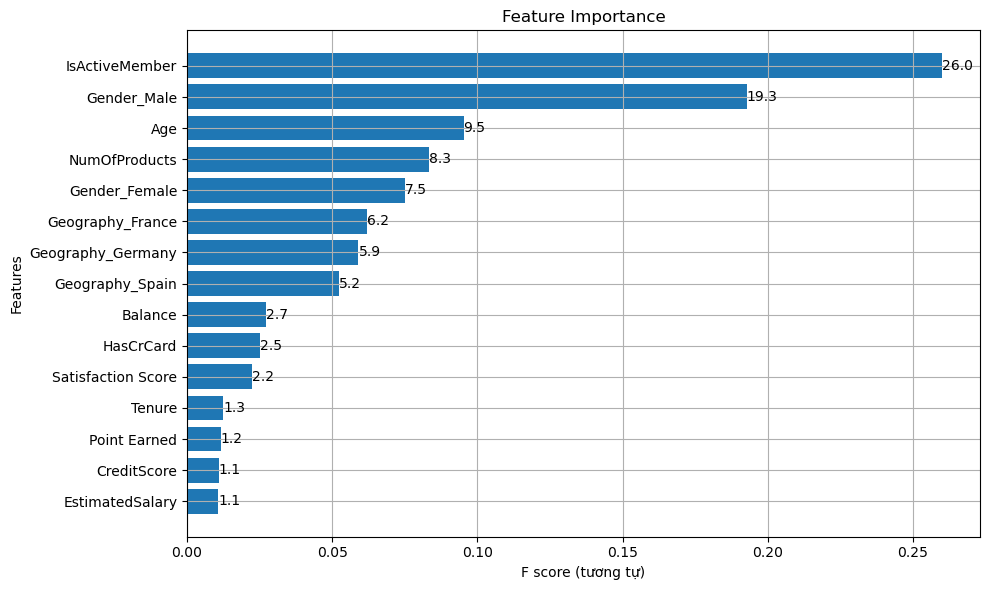

In [11]:
# Trực quan hóa tầm quan trọng của đặc trưng (tương tự như plot_importance)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('F score (tương tự)')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.grid(True)

# Thêm giá trị F score (tương tự) lên trên các cột
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value*100:.1f}', va='center') # Nhân với 100 để có giá trị tương tự F score

plt.gca().invert_yaxis() # Đảo ngược trục y để đặc trưng quan trọng nhất ở trên cùng
plt.tight_layout()
plt.show()

SHAP

In [12]:
model = grid_search_xgb.best_estimator_

In [16]:
pip install shap

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.4 MB/s eta 0:00:01
   ---- ---------------------------------- 61.4/544.4 kB 656.4 kB/s eta 0:00:01
   ---------- ----------------------------- 143.4/544.4 kB 1.1 MB/s eta 0:00:01
   -------------- ------------------------- 194.6/544.4 kB 1.1 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/544.4 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/544.4 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/544.4 kB 1.2 MB/s eta 0:00:01
   ------------------ --------------------- 256.0/544.4 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 522.2/544.4 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 522.2/544.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use up

In [18]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/275.7 kB 222.6 kB/s eta 0:00:02
     ------ ------------------------------ 51.2/275.7 kB 375.8 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/275.7 kB 525.1 kB/s eta 0:00:01
     ---------------------- ------------- 174.1/275.7 kB 807.1 kB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=190f4666c65d7df28a075cdd8860ffcf7f3c471785e4cccd92636bf304a6920c
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use up

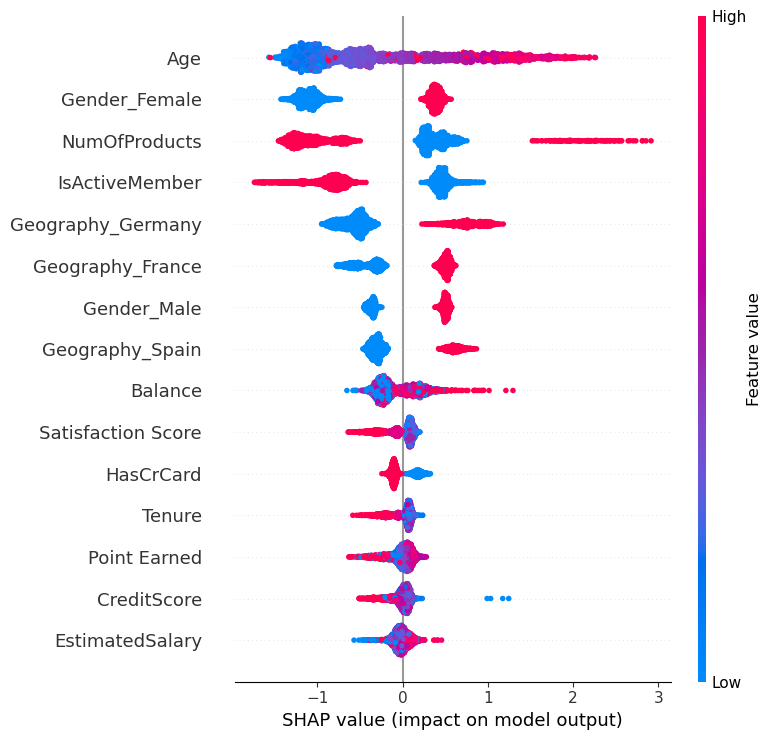

In [13]:
import shap
from lime.lime_tabular import LimeTabularExplainer
explainer_shap = shap.TreeExplainer(model)
shap_values = explainer_shap.shap_values(X_test)

# SHAP summary plot (toàn bộ tập test)
shap.summary_plot(shap_values, X_test)

In [20]:
# SHAP force plot cho 1 cá nhân (ví dụ dòng đầu tiên)
shap.initjs()
shap.force_plot(explainer_shap.expected_value, shap_values[0,:], X_test.iloc[0,:])

LIME

In [21]:
explainer_lime = LimeTabularExplainer(training_data=np.array(X_train),
                                      feature_names=X_train.columns,
                                      class_names=['Keep', 'Churn'],
                                      mode='classification')

In [22]:
i = 0
exp = explainer_lime.explain_instance(X_test.iloc[i].values, 
                                      model.predict_proba, 
                                      num_features=5)

exp.show_in_notebook(show_table=True)
